In [49]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing



In [50]:
bankloan=pd.read_excel(r"C:\Users\sathv\LU\datasets\Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [51]:
bankloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [52]:
bankloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [53]:
bankloan.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [54]:
x_features=[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [55]:
#RandomForest for pruning
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
rf_model.fit(X=bankloan[x_features],y=bankloan['Personal Loan'])
print(rf_model.oob_score_)

0.9882


In [56]:
for feature,imp in zip(x_features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.04453707612270215
Experience 0.045028135696411405
Income 0.3406652791040879
Family 0.09807020119548844
CCAvg 0.1822204299716421
Education 0.16710074088865876
Mortgage 0.04320709696222832
Securities Account 0.005489650122227894
CD Account 0.05555005547515655
Online 0.008228349505314364
CreditCard 0.009902984956082156


In [57]:
x_train=bankloan[['Family','CCAvg','Education','CD Account']]
rf_model.fit(X=x_train,y=bankloan['Personal Loan'])
print(rf_model.oob_score_)

0.9672


In [58]:
#Creating tree
tree_model=tree.DecisionTreeClassifier(max_depth=6)
tree_model.fit(X=x_train,y=bankloan['Personal Loan'])


DecisionTreeClassifier(max_depth=6)

In [59]:
with open("Dtree2.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=[ 'Family','CCAvg','Education','CD Account'],out_file=f)

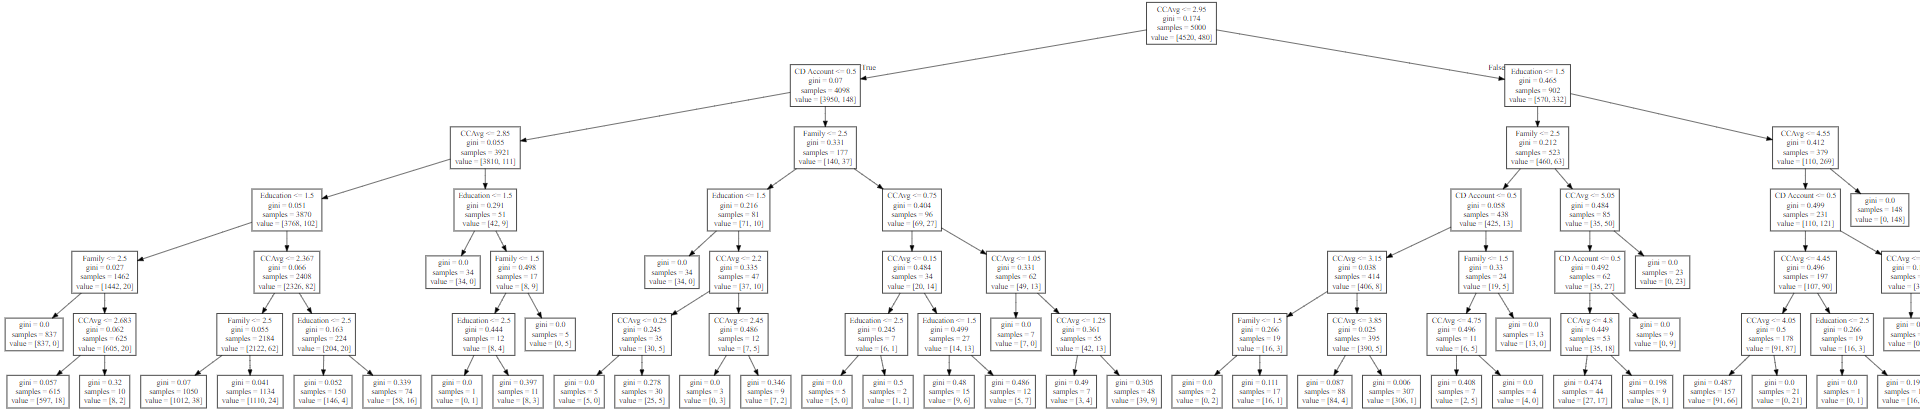